In [1]:
# import standard libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# load dataset

In [4]:
df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\train.csv")
df

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845
...,...,...,...,...,...,...
2829,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files...,CC BY-SA 3.0,When you think of dinosaurs and where they liv...,1.711390,0.646900
2830,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,So what is a solid? Solids are usually hard be...,0.189476,0.535648
2831,cd19e2350,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,The second state of matter we will discuss is ...,0.255209,0.483866
2832,15e2e9e7a,https://en.wikibooks.org/wiki/Geometry_for_Ele...,CC BY-SA 3.0,Solids are shapes that you can actually touch....,-0.215279,0.514128


###  target column analysis

In [5]:
df.target.describe()

count    2834.000000
mean       -0.959319
std         1.033579
min        -3.676268
25%        -1.690320
50%        -0.912190
75%        -0.202540
max         1.711390
Name: target, dtype: float64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

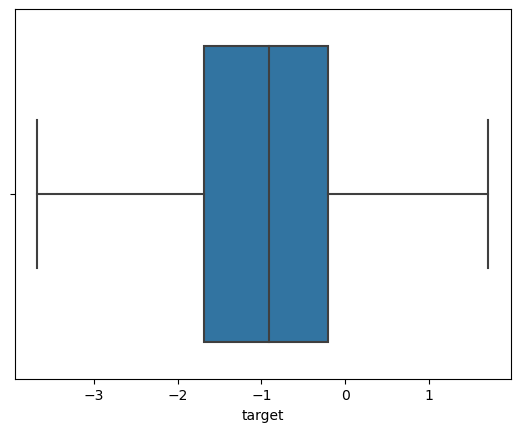

In [6]:
sb.boxplot(df.target)

# the target values ranginf from -3 to 1

In [7]:
# drop unnecsarry columns

In [8]:
df=df.drop(["id","url_legal","license","standard_error"],axis=1)
df

,excerpt,target
0,When the young people returned to the ballroom...,-0.340259
1,"All through dinner time, Mrs. Fayre was somewh...",-0.315372
2,"As Roger had predicted, the snow departed as q...",-0.580118
3,And outside before the palace a great garden w...,-1.054013
4,Once upon a time there were Three Bears who li...,0.247197
...,...,...
2829,When you think of dinosaurs and where they liv...,1.711390
2830,So what is a solid? Solids are usually hard be...,0.189476
2831,The second state of matter we will discuss is ...,0.255209
2832,Solids are shapes that you can actually touch....,-0.215279


In [9]:
# missing values analysis

df.isnull().sum()   # no missing values

excerpt    0
target     0
dtype: int64

####  text preprocessing on Excerpt column

In [10]:
# step 1) covert the text column into lowercase

In [11]:
df["excerpt"]=df.excerpt.str.lower()
df

,excerpt,target
0,when the young people returned to the ballroom...,-0.340259
1,"all through dinner time, mrs. fayre was somewh...",-0.315372
2,"as roger had predicted, the snow departed as q...",-0.580118
3,and outside before the palace a great garden w...,-1.054013
4,once upon a time there were three bears who li...,0.247197
...,...,...
2829,when you think of dinosaurs and where they liv...,1.711390
2830,so what is a solid? solids are usually hard be...,0.189476
2831,the second state of matter we will discuss is ...,0.255209
2832,solids are shapes that you can actually touch....,-0.215279


In [12]:
#2) removing stop words

In [13]:
# find out the stop words

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords=stopwords.words("english")
stopwords  

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
# compare the stop words and with the text columns and removei t

In [15]:
# define a function to remove stop words

def remove_stopwords(text):
    return " ".join([i for i in text.split() if i not in stopwords])

In [16]:
# apply th function on the text columns

df["excerpt"]=df["excerpt"].apply(lambda x:remove_stopwords(x))
df

,excerpt,target
0,"young people returned ballroom, presented deci...",-0.340259
1,"dinner time, mrs. fayre somewhat silent, eyes ...",-0.315372
2,"roger predicted, snow departed quickly came, t...",-0.580118
3,"outside palace great garden walled round, fill...",-1.054013
4,upon time three bears lived together house woo...,0.247197
...,...,...
2829,"think dinosaurs lived, picture? see hot, steam...",1.711390
2830,solid? solids usually hard molecules packed to...,0.189476
2831,second state matter discuss liquid. solids har...,0.255209
2832,solids shapes actually touch. three dimensions...,-0.215279


In [17]:
# 3) remove all the digits from text

In [18]:
# import re module and define function to remove digits

import re
def remove_nums(text):
    return re.sub("[0-9]+","",text)

In [19]:
# apply thr function on text columns

df["excerpt"]=df["excerpt"].apply(lambda x : remove_nums(x))
df

,excerpt,target
0,"young people returned ballroom, presented deci...",-0.340259
1,"dinner time, mrs. fayre somewhat silent, eyes ...",-0.315372
2,"roger predicted, snow departed quickly came, t...",-0.580118
3,"outside palace great garden walled round, fill...",-1.054013
4,upon time three bears lived together house woo...,0.247197
...,...,...
2829,"think dinosaurs lived, picture? see hot, steam...",1.711390
2830,solid? solids usually hard molecules packed to...,0.189476
2831,second state matter discuss liquid. solids har...,0.255209
2832,solids shapes actually touch. three dimensions...,-0.215279


In [20]:
# 4) remove all the url

In [21]:
# import re module and define functions

import re
def remove_url(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',"",text)

In [22]:
# apply the function on the text column

df["excerpt"]=df["excerpt"].apply(lambda x:remove_url(x))
df

,excerpt,target
0,"young people returned ballroom, presented deci...",-0.340259
1,"dinner time, mrs. fayre somewhat silent, eyes ...",-0.315372
2,"roger predicted, snow departed quickly came, t...",-0.580118
3,"outside palace great garden walled round, fill...",-1.054013
4,upon time three bears lived together house woo...,0.247197
...,...,...
2829,"think dinosaurs lived, picture? see hot, steam...",1.711390
2830,solid? solids usually hard molecules packed to...,0.189476
2831,second state matter discuss liquid. solids har...,0.255209
2832,solids shapes actually touch. three dimensions...,-0.215279


In [23]:
#step 5) remove and clean repeating words/characters

In [24]:
# import re and define function

import re
def cleaning_dup(text):
    return re.sub(r'(.)1+',r'1',text)

In [25]:
df["excerpt"]=df["excerpt"].apply(lambda x:cleaning_dup(x))
df

,excerpt,target
0,"young people returned ballroom, presented deci...",-0.340259
1,"dinner time, mrs. fayre somewhat silent, eyes ...",-0.315372
2,"roger predicted, snow departed quickly came, t...",-0.580118
3,"outside palace great garden walled round, fill...",-1.054013
4,upon time three bears lived together house woo...,0.247197
...,...,...
2829,"think dinosaurs lived, picture? see hot, steam...",1.711390
2830,solid? solids usually hard molecules packed to...,0.189476
2831,second state matter discuss liquid. solids har...,0.255209
2832,solids shapes actually touch. three dimensions...,-0.215279


In [26]:
# step 6) removing punctuations

In [27]:
# import punctuations from string module

import string
punct=string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
# create function using punctuations and apply it on text columns

In [29]:
def remove_punc(text):
    translator=str.maketrans('','',punct)
    return text.translate(translator)

In [30]:
df["excerpt"]=df["excerpt"].apply(lambda x:remove_punc(x))
df

,excerpt,target
0,young people returned ballroom presented decid...,-0.340259
1,dinner time mrs fayre somewhat silent eyes res...,-0.315372
2,roger predicted snow departed quickly came two...,-0.580118
3,outside palace great garden walled round fille...,-1.054013
4,upon time three bears lived together house woo...,0.247197
...,...,...
2829,think dinosaurs lived picture see hot steamy s...,1.711390
2830,solid solids usually hard molecules packed tog...,0.189476
2831,second state matter discuss liquid solids hard...,0.255209
2832,solids shapes actually touch three dimensions ...,-0.215279


In [31]:
# step 7 ) lemmatization

In [32]:
# import lemmatizer form the nltk module 

from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
wl

<WordNetLemmatizer>

In [33]:
# create a function on with the help of porter stemmer for lemmatization

def lemmatizer_on_text(df):
    text=[wl.lemmatize(word) for word in df]
    return df

In [34]:
# apply the fucntion

import nltk
nltk.download("wordnet")
nltk.download('omw-1.4')

df["excerpt"]=df["excerpt"].apply(lambda x:lemmatizer_on_text(x))
df

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,excerpt,target
0,young people returned ballroom presented decid...,-0.340259
1,dinner time mrs fayre somewhat silent eyes res...,-0.315372
2,roger predicted snow departed quickly came two...,-0.580118
3,outside palace great garden walled round fille...,-1.054013
4,upon time three bears lived together house woo...,0.247197
...,...,...
2829,think dinosaurs lived picture see hot steamy s...,1.711390
2830,solid solids usually hard molecules packed tog...,0.189476
2831,second state matter discuss liquid solids hard...,0.255209
2832,solids shapes actually touch three dimensions ...,-0.215279


#### DIVIDE AND SPLIT DATA INTO TRAIN AND TEST

In [35]:
x=df.drop(["target"],axis=1)
y=df["target"]

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [37]:
## feature encoding using countvectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv

CountVectorizer()

In [39]:
cv.fit(x_train["excerpt"])

CountVectorizer()

In [40]:
x_train=cv.transform(x_train["excerpt"])
x_test=cv.transform(x_test["excerpt"])

In [41]:
x_train

<1983x23607 sparse matrix of type '<class 'numpy.int64'>'
	with 145572 stored elements in Compressed Sparse Row format>

In [42]:
x_test

<851x23607 sparse matrix of type '<class 'numpy.int64'>'
	with 57201 stored elements in Compressed Sparse Row format>

#### apply linear regression for prediction

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [63]:
lr.fit(x_train,y_train)

LinearRegression()

In [67]:
pred=lr.predict(x_test)
pred

array([ 1.70676870e-01, -1.24313729e+00,  3.91234657e-01, -2.66624844e+00,
       -5.92600687e-01, -1.26869631e+00,  1.68740254e+00, -9.02746218e-01,
       -1.56374537e+00, -8.96105008e-01, -2.14799959e+00, -7.41881703e-02,
       -2.66092675e-01, -3.70905560e-01, -7.62468995e-01,  6.07907812e-01,
       -4.48663736e-01, -6.63490980e-01, -5.55863390e-01, -9.19673908e-01,
       -1.31245392e-01, -1.32552790e+00, -5.48888428e-01, -1.94079709e+00,
       -7.05802441e-01, -1.74574434e+00, -1.29342536e+00, -5.05179531e-01,
       -2.41733249e-01, -1.89579161e-01, -1.35405806e+00, -9.03060020e-01,
        3.64712798e-01, -5.10874836e-01, -7.70094825e-01, -1.33802773e+00,
       -1.18538696e+00, -2.78651547e-01, -1.91963140e+00, -8.40276105e-01,
       -2.41490968e+00, -1.12925107e+00, -1.80905700e+00,  9.61722820e-01,
        5.05805172e-01, -6.60940280e-02, -1.11085721e-01, -2.04026140e+00,
       -1.60820013e+00, -1.12545096e+00, -7.80054911e-01, -1.98294857e+00,
       -6.21287801e-01, -